# Outliers and Outlier Visualization
John Bonfardeci<br/>
2020-01-27

### Load External Libraries

In [1]:
# Pandas DataFrames for reading and manipulating data.
# Think of it as in-memory Excel sheets, but more practical and powerful!
import pandas as pd

import numpy as np

# Matplotlib & PyPlot for visualization.
import matplotlib.pyplot as plt

# Tell Matplotlib to use Ggplot-style charts as in R.
#plt.style.use('ggplot')

# Seaborn is a helper library makeing Matplotlib easier to use.
import seaborn as sns

# Stats tools
from scipy import stats

from statistics import median

## Read the Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


## Plot Boxplots with Seaborn
A simple example.

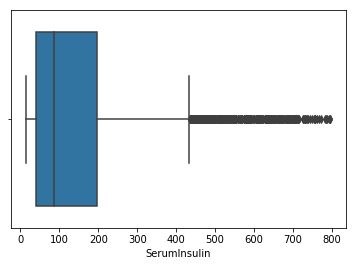

In [3]:
box = sns.boxplot(x=df['SerumInsulin'])
box.set_title = "SerumInsulin Boxplot"

## How to Show Boxplot for Each Category?

## Create a Boxplot for Each Diagnosis Category
Create a new categorical variable.

* Use the <strong>map()</strong> function to iterate over all values in a column and 
* Execute a <strong>lambda</strong> function on each value. A lambda function is an "anonymous" function.
* This lambda function uses a "ternary" statement to write a label for:<br />
    `"Diabetic" if n == 1 else "Non-diabetic"`

In [4]:
mapped = map(lambda n: "Diabetic" if n == 1 else "Non-Diabetic", df['Diabetic'])

# Convert the map object into a list.
dx = list(mapped)

# Display the first 5 labels for our new column.
dx[0:5]

['Non-Diabetic', 'Non-Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic']

In [5]:
# Add the new column to the dataframe.
df['Dx'] = dx # Where "Dx" is short for "Diagnosis"
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Dx
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Non-Diabetic
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Non-Diabetic
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Non-Diabetic
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Diabetic
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Non-Diabetic


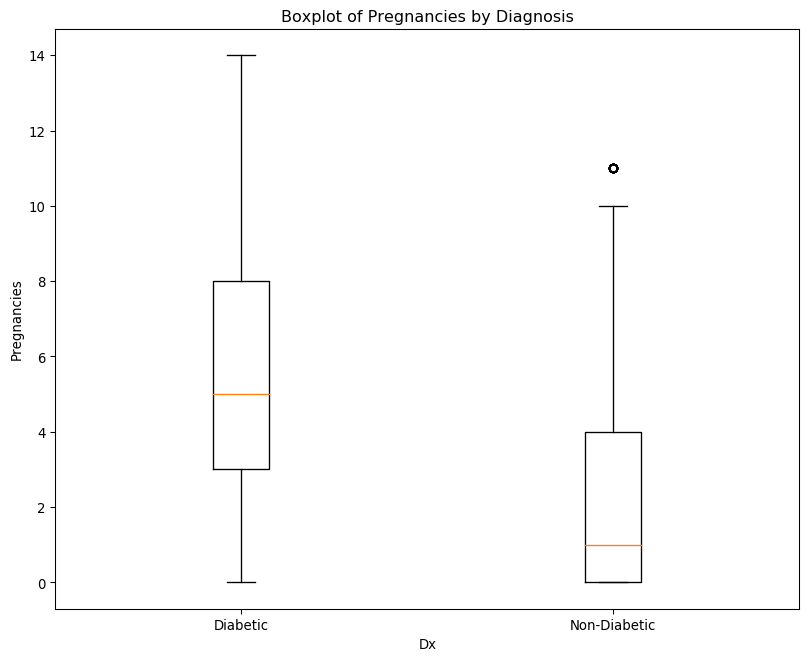

In [6]:
# Running code inside this "if" statement keeps variables out of the global scope
# so you can reuse variable names without affecting local variable scopes.
# '__main__' is the "entry point" for every cell in Jupyter Notebooks. 
if __name__ == '__main__':
    label = 'Pregnancies'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension filter" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

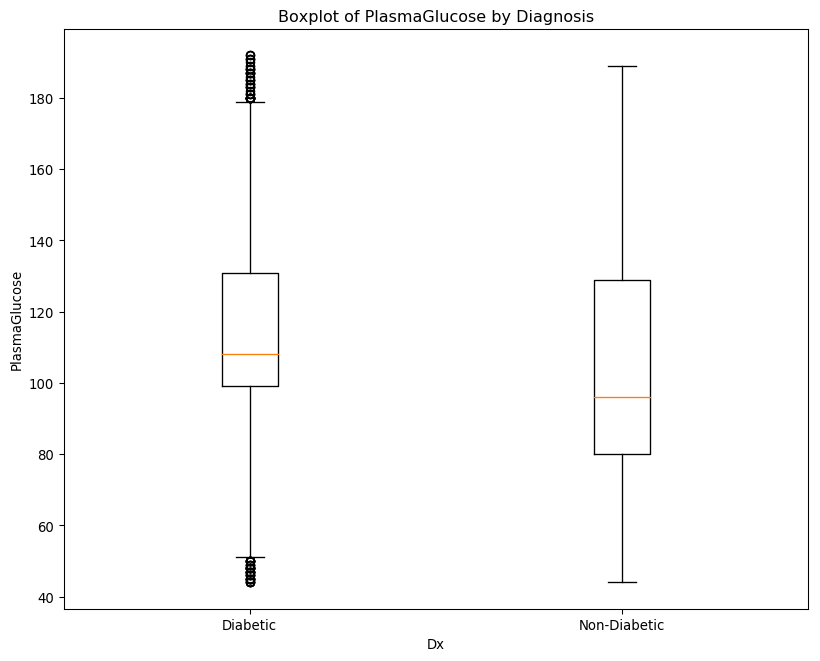

In [7]:
if __name__ == '__main__':
    label = 'PlasmaGlucose'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

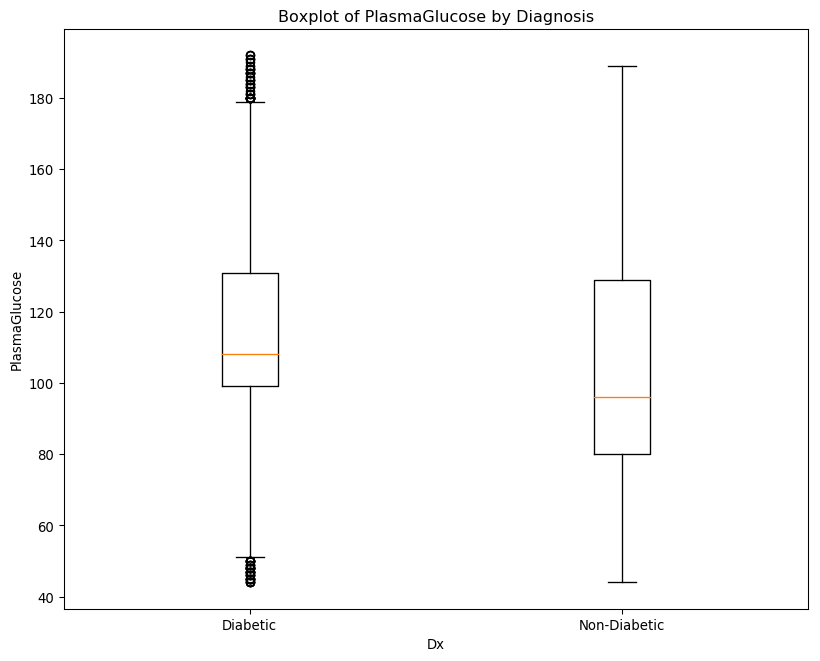

In [8]:
if __name__ == '__main__':
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic']['PlasmaGlucose']
    diabetic = df[df['Dx'] == 'Diabetic']['PlasmaGlucose']
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel('PlasmaGlucose')
    axes1.set_title('Boxplot of PlasmaGlucose by Diagnosis')

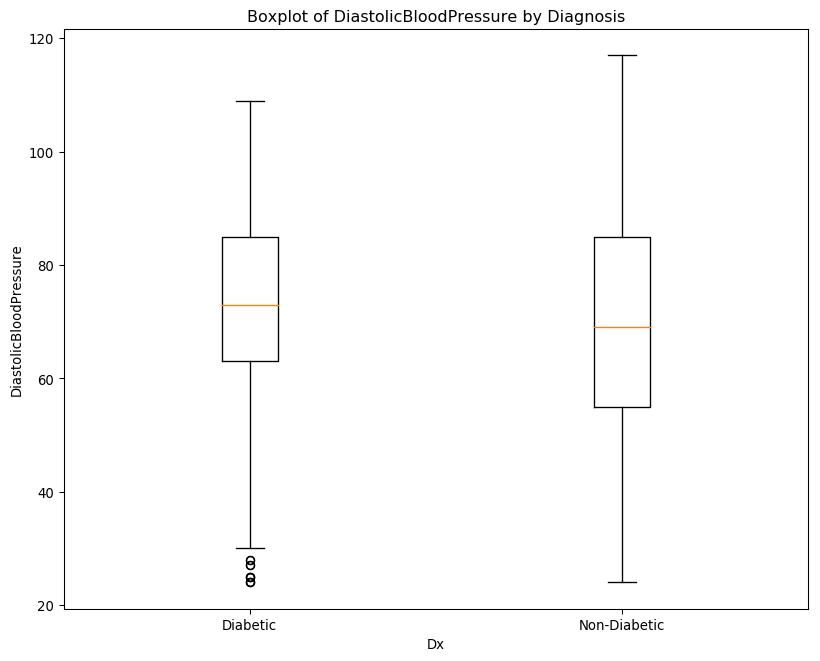

In [9]:
if __name__ == '__main__':
    label = 'DiastolicBloodPressure'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

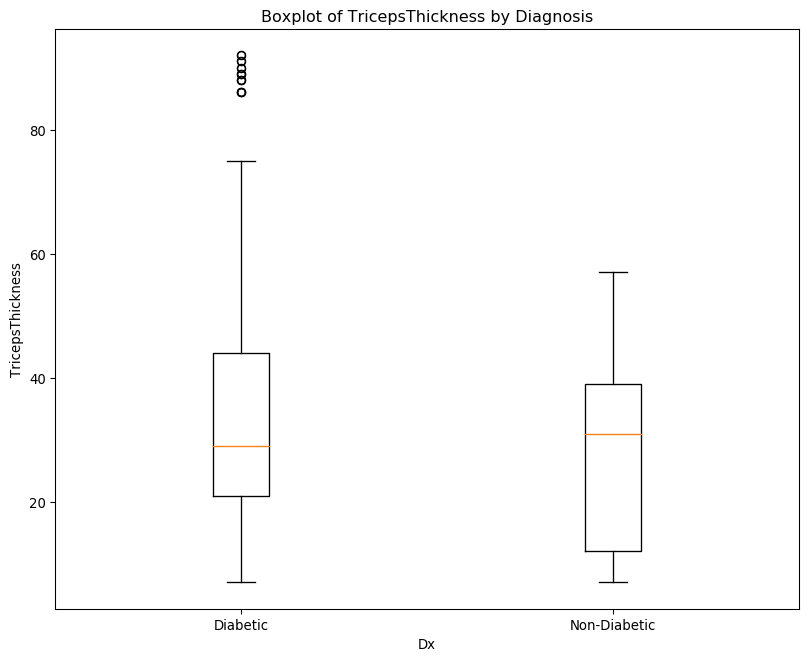

In [10]:
if __name__ == '__main__':
    label = 'TricepsThickness'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

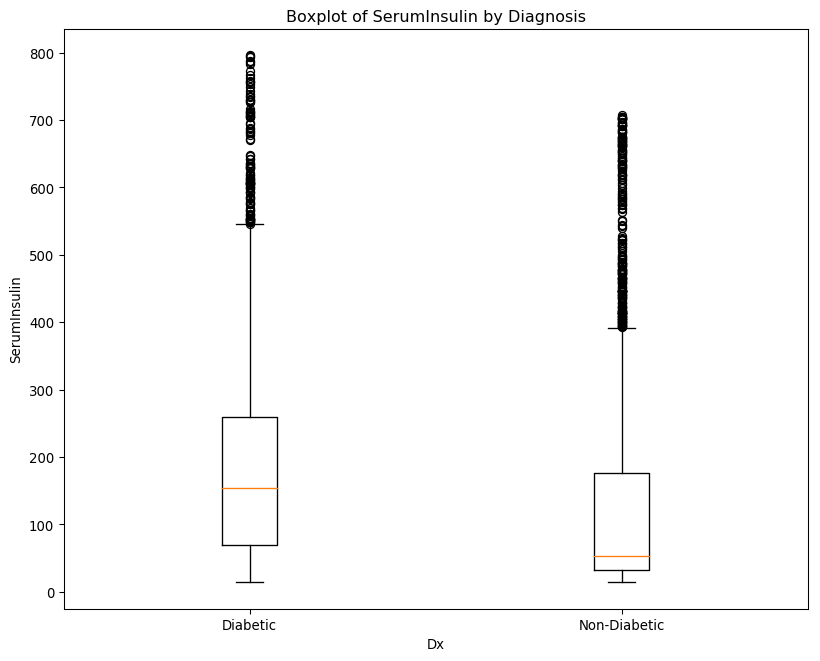

In [11]:
if __name__ == '__main__':
    label = 'SerumInsulin'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

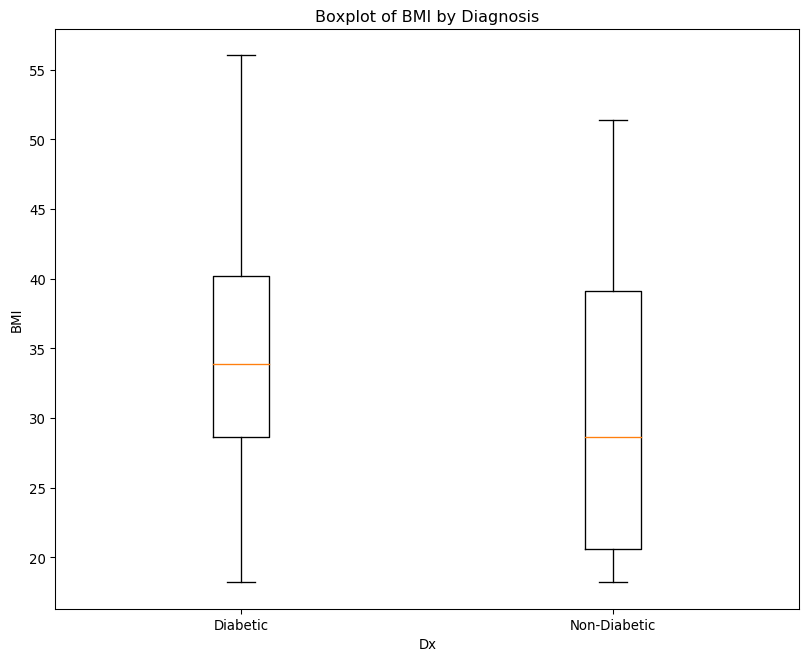

In [12]:
if __name__ == '__main__':
    label = 'BMI'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

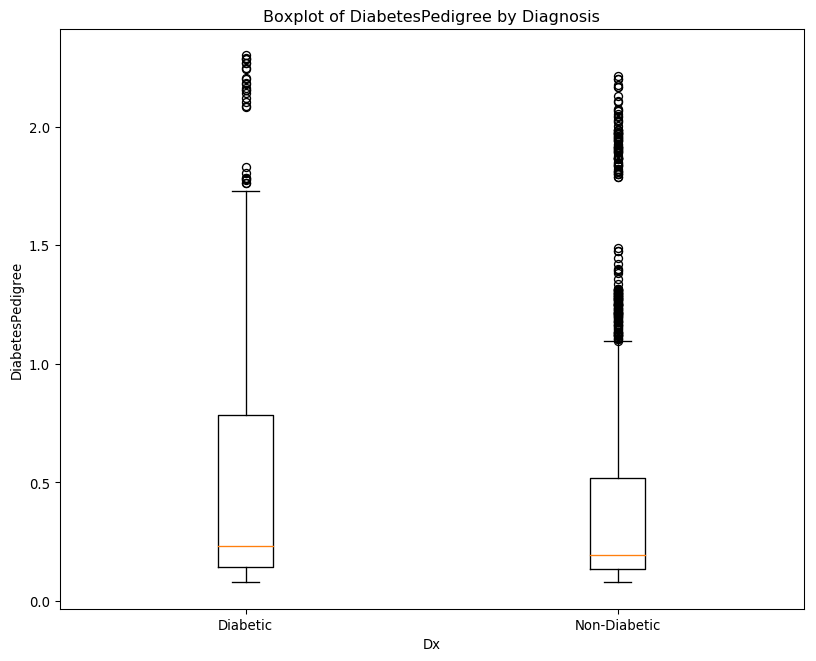

In [13]:
if __name__ == '__main__':
    label = 'DiabetesPedigree'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

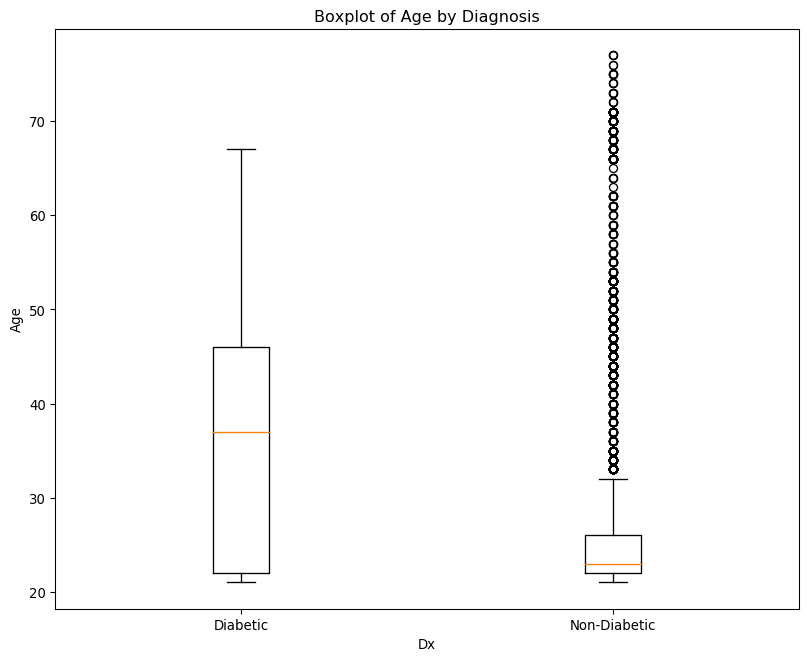

In [14]:
if __name__ == '__main__':
    label = 'Age'
    
    # Declare a boxplot
    box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
    axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

    # Group data by Diagnosis with a "list comprehension" method.
    nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
    diabetic = df[df['Dx'] == 'Diabetic'][label]
    dx_groups = [diabetic, nondiabetic]

    axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])

    axes1.set_xlabel('Dx')
    axes1.set_ylabel(label)
    axes1.set_title('Boxplot of ' + label + ' by Diagnosis')

## Create a Reusable Function

In [19]:
def show_boxplots(df, columns):
    """
    Show a boxplot for each numerical column, grouped by diagnosis, in the Diabetes dataset.
    """
    def get_plot(label):
        # Declare a boxplot
        box = plt.figure(num=None, figsize=(10, 8), dpi=96, facecolor='w', edgecolor='k')
        axes1 = box.add_subplot(1,1,1) # Create an empty grid. '1,1,1' are position params.

        # Group data by Diagnosis with a "list comprehension" method.
        nondiabetic = df[df['Dx'] == 'Non-Diabetic'][label]
        diabetic = df[df['Dx'] == 'Diabetic'][label]
        dx_groups = [diabetic, nondiabetic]

        axes1.boxplot(dx_groups, labels=['Diabetic', 'Non-Diabetic'])
        axes1.set_xlabel('Dx')
        axes1.set_ylabel(label)
        axes1.set_title('Boxplot of ' + label + ' by Diagnosis')
        
    for label in columns:
        get_plot(label)
  

if __name__ == '__main__':
    columns = df.columns.values.tolist()
    columns.remove('PatientID')
    columns.remove('Diabetic')
    columns.remove('Dx')
    show_boxplots(df, columns)

<h2>How to Calculate the Lower and Upper Limits for Outliers</h2>

<p style="font-size:1.2em">Recall:</p>
<div style="font-size:1.2em">
    <ul>
        <li>Upper limit = Q3 + 1.5(IQR)</li>
        <li>Lower limit = Q1 - 1.5(IQR)</li>
    </ul>
    <p>Numbers <u>less than the lower limit</u> or <u>greater than the upper limit</u> are considered to be <strong>outliers</strong>.</p>
</div>
 

In [16]:
def quartiles(values):
    """
    Find Q1 and Q3 for a range of numerical values.
    """
    srt = sorted(values) # sort values ascending
    mid = len(srt) // 2 # determine middle value of array
    # find Q1 with the median function of lower half of data
    q1 = median(srt[:mid]) 
    q3 = 0  
    # find Q3 with the median function of upper half of data
    if(mid % 2 == 0):
        q3 = median(srt[mid:])
    else:
        q3 = median(srt[mid+1:])

    return q1, q3

def get_outliers(df, columns):
    """
    IQR = Q3-Q1
    Upper limit = Q3 + 1.5(IQR)
    Lower limit = Q1 - 1.5(IQR)
    """
    cols = []
    data = []
    outliers = None
    outliers = pd.DataFrame()
    
    for col in columns:
        q1, q3 = quartiles(df[col])
        iqr = q3-q1
        uppr = q3 + 1.5*iqr
        lowr = q1 - 1.5*iqr
        mn = min(df[col].values)
        mx = max(df[col].values)
        has_lower = mn < lowr
        has_upper = mx > uppr
        data.append((col, mn, lowr, uppr, mx))
        
        # Create dummy column for outliers.
        if mn < lowr or mx > uppr:
            outliers[col+'_outlier'] = \
            list(map(lambda n: 1 if (n < lowr or n > uppr) else 0, df[col].values))
        
    return outliers, pd.DataFrame(columns=['Xi', 'Min(Xi)', 'Lower Limit', 'Upper Limit', 'Max(Xi)'], \
                        data=data)
        

columns = df.columns.values.tolist()
columns.remove('PatientID')
columns.remove('Diabetic')
columns.remove('Dx')

outliers, desc = get_outliers(df, columns)

display(desc)

,Xi,Min(Xi),Lower Limit,Upper Limit,Max(Xi)
0,Pregnancies,0.000000,-9.000000,15.000000,14.000000
1,PlasmaGlucose,44.000000,16.500000,196.500000,192.000000
2,DiastolicBloodPressure,24.000000,17.500000,125.500000,117.000000
3,TricepsThickness,7.000000,-24.000000,80.000000,92.000000
4,SerumInsulin,14.000000,-198.000000,434.000000,796.000000
5,BMI,18.200807,-5.876069,66.452387,56.034628
6,DiabetesPedigree,0.078044,-0.589242,1.347555,2.301594
7,Age,21.000000,2.500000,54.500000,77.000000


In [17]:
outliers.head()

,TricepsThickness_outlier,SerumInsulin_outlier,DiabetesPedigree_outlier,Age_outlier
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [18]:
df = pd.concat([df, outliers], 1)
df.tail()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Dx,TricepsThickness_outlier,SerumInsulin_outlier,DiabetesPedigree_outlier,Age_outlier
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0,Non-Diabetic,0,0,0,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0,Non-Diabetic,0,0,0,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1,Diabetic,0,0,1,0
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0,Non-Diabetic,0,0,0,0
9999,1332938,10,100,54,34,27,38.840943,0.175465,23,0,Non-Diabetic,0,0,0,0
